In [1]:
%matplotlib inline
import pandas as pd
import numpy as np 
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.nonparametric.smoothers_lowess import lowess
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_squared_error
warnings.filterwarnings("ignore")

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [2]:
df = pd.read_csv('Hittersdata.csv').dropna().drop('Player', axis = 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 263 entries, 0 to 262
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   AtBat        263 non-null    int64  
 1   Hits         263 non-null    int64  
 2   HmRun        263 non-null    int64  
 3   Runs         263 non-null    int64  
 4   RBI          263 non-null    int64  
 5   Walks        263 non-null    int64  
 6   Years        263 non-null    int64  
 7   CAtBat       263 non-null    int64  
 8   CHits        263 non-null    int64  
 9   CHmRun       263 non-null    int64  
 10  CRuns        263 non-null    int64  
 11  CRBI         263 non-null    int64  
 12  CWalks       263 non-null    int64  
 13  PutOuts      263 non-null    int64  
 14  Assists      263 non-null    int64  
 15  Errors       263 non-null    int64  
 16  Salary       263 non-null    float64
 17  League_A     263 non-null    int64  
 18  Division_E   263 non-null    int64  
 19  NewLeagu

In [4]:
y = df.Salary
X = df.drop(['Salary'], axis = 1).astype('float64')
X.info

<bound method DataFrame.info of      AtBat   Hits  HmRun  Runs   RBI  Walks  Years  CAtBat   CHits  CHmRun  \
0    315.0   81.0    7.0  24.0  38.0   39.0   14.0  3449.0   835.0    69.0   
1    479.0  130.0   18.0  66.0  72.0   76.0    3.0  1624.0   457.0    63.0   
2    496.0  141.0   20.0  65.0  78.0   37.0   11.0  5628.0  1575.0   225.0   
3    321.0   87.0   10.0  39.0  42.0   30.0    2.0   396.0   101.0    12.0   
4    594.0  169.0    4.0  74.0  51.0   35.0   11.0  4408.0  1133.0    19.0   
..     ...    ...    ...   ...   ...    ...    ...     ...     ...     ...   
258  497.0  127.0    7.0  65.0  48.0   37.0    5.0  2703.0   806.0    32.0   
259  492.0  136.0    5.0  76.0  50.0   94.0   12.0  5511.0  1511.0    39.0   
260  475.0  126.0    3.0  61.0  43.0   52.0    6.0  1700.0   433.0     7.0   
261  573.0  144.0    9.0  85.0  60.0   78.0    8.0  3198.0   857.0    97.0   
262  631.0  170.0    9.0  77.0  44.0   31.0   11.0  4908.0  1457.0    30.0   

     CRuns   CRBI  CWalks  PutO

In [5]:
alphas = 10**np.linspace(10,-2,100)*0.5
alphas

array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+07, 1.07721735e+07, 8.14875417e+06,
       6.16423370e+06, 4.66301673e+06, 3.52740116e+06, 2.66834962e+06,
       2.01850863e+06, 1.52692775e+06, 1.15506485e+06, 8.73764200e+05,
       6.60970574e+05, 5.00000000e+05, 3.78231664e+05, 2.86118383e+05,
       2.16438064e+05, 1.63727458e+05, 1.23853818e+05, 9.36908711e+04,
       7.08737081e+04, 5.36133611e+04, 4.05565415e+04, 3.06795364e+04,
       2.32079442e+04, 1.75559587e+04, 1.32804389e+04, 1.00461650e+04,
       7.59955541e+03, 5.74878498e+03, 4.34874501e+03, 3.28966612e+03,
       2.48851178e+03, 1.88246790e+03, 1.42401793e+03, 1.07721735e+03,
      

In [6]:
ridge = Ridge(normalize = True)
coefs = []

for a in alphas:
    ridge.set_params(alpha = a)
    ridge.fit(X, y)
    coefs.append(ridge.coef_)
    
np.shape(coefs)

Ridge(alpha=5000000000.0, normalize=True)

Ridge(alpha=5000000000.0, normalize=True)

Ridge(alpha=3782316637.773145, normalize=True)

Ridge(alpha=3782316637.773145, normalize=True)

Ridge(alpha=2861183829.67511, normalize=True)

Ridge(alpha=2861183829.67511, normalize=True)

Ridge(alpha=2164380640.5415306, normalize=True)

Ridge(alpha=2164380640.5415306, normalize=True)

Ridge(alpha=1637274581.438866, normalize=True)

Ridge(alpha=1637274581.438866, normalize=True)

Ridge(alpha=1238538177.995857, normalize=True)

Ridge(alpha=1238538177.995857, normalize=True)

Ridge(alpha=936908711.4301934, normalize=True)

Ridge(alpha=936908711.4301934, normalize=True)

Ridge(alpha=708737081.4634038, normalize=True)

Ridge(alpha=708737081.4634038, normalize=True)

Ridge(alpha=536133611.00516266, normalize=True)

Ridge(alpha=536133611.00516266, normalize=True)

Ridge(alpha=405565415.3948445, normalize=True)

Ridge(alpha=405565415.3948445, normalize=True)

Ridge(alpha=306795363.6706582, normalize=True)

Ridge(alpha=306795363.6706582, normalize=True)

Ridge(alpha=232079441.68063864, normalize=True)

Ridge(alpha=232079441.68063864, normalize=True)

Ridge(alpha=175559586.71075636, normalize=True)

Ridge(alpha=175559586.71075636, normalize=True)

Ridge(alpha=132804389.1473342, normalize=True)

Ridge(alpha=132804389.1473342, normalize=True)

Ridge(alpha=100461650.1282523, normalize=True)

Ridge(alpha=100461650.1282523, normalize=True)

Ridge(alpha=75995554.14764665, normalize=True)

Ridge(alpha=75995554.14764665, normalize=True)

Ridge(alpha=57487849.769886784, normalize=True)

Ridge(alpha=57487849.769886784, normalize=True)

Ridge(alpha=43487450.13088917, normalize=True)

Ridge(alpha=43487450.13088917, normalize=True)

Ridge(alpha=32896661.232878413, normalize=True)

Ridge(alpha=32896661.232878413, normalize=True)

Ridge(alpha=24885117.82166057, normalize=True)

Ridge(alpha=24885117.82166057, normalize=True)

Ridge(alpha=18824679.033962358, normalize=True)

Ridge(alpha=18824679.033962358, normalize=True)

Ridge(alpha=14240179.342179025, normalize=True)

Ridge(alpha=14240179.342179025, normalize=True)

Ridge(alpha=10772173.450159412, normalize=True)

Ridge(alpha=10772173.450159412, normalize=True)

Ridge(alpha=8148754.173103217, normalize=True)

Ridge(alpha=8148754.173103217, normalize=True)

Ridge(alpha=6164233.69721033, normalize=True)

Ridge(alpha=6164233.69721033, normalize=True)

Ridge(alpha=4663016.734416099, normalize=True)

Ridge(alpha=4663016.734416099, normalize=True)

Ridge(alpha=3527401.1553593227, normalize=True)

Ridge(alpha=3527401.1553593227, normalize=True)

Ridge(alpha=2668349.615603151, normalize=True)

Ridge(alpha=2668349.615603151, normalize=True)

Ridge(alpha=2018508.6292982749, normalize=True)

Ridge(alpha=2018508.6292982749, normalize=True)

Ridge(alpha=1526927.7544167063, normalize=True)

Ridge(alpha=1526927.7544167063, normalize=True)

Ridge(alpha=1155064.850041579, normalize=True)

Ridge(alpha=1155064.850041579, normalize=True)

Ridge(alpha=873764.2000038414, normalize=True)

Ridge(alpha=873764.2000038414, normalize=True)

Ridge(alpha=660970.5742330144, normalize=True)

Ridge(alpha=660970.5742330144, normalize=True)

Ridge(alpha=500000.0, normalize=True)

Ridge(alpha=500000.0, normalize=True)

Ridge(alpha=378231.66377731453, normalize=True)

Ridge(alpha=378231.66377731453, normalize=True)

Ridge(alpha=286118.382967511, normalize=True)

Ridge(alpha=286118.382967511, normalize=True)

Ridge(alpha=216438.06405415307, normalize=True)

Ridge(alpha=216438.06405415307, normalize=True)

Ridge(alpha=163727.45814388624, normalize=True)

Ridge(alpha=163727.45814388624, normalize=True)

Ridge(alpha=123853.81779958545, normalize=True)

Ridge(alpha=123853.81779958545, normalize=True)

Ridge(alpha=93690.87114301915, normalize=True)

Ridge(alpha=93690.87114301915, normalize=True)

Ridge(alpha=70873.70814634024, normalize=True)

Ridge(alpha=70873.70814634024, normalize=True)

Ridge(alpha=53613.36110051616, normalize=True)

Ridge(alpha=53613.36110051616, normalize=True)

Ridge(alpha=40556.54153948436, normalize=True)

Ridge(alpha=40556.54153948436, normalize=True)

Ridge(alpha=30679.536367065877, normalize=True)

Ridge(alpha=30679.536367065877, normalize=True)

Ridge(alpha=23207.944168063863, normalize=True)

Ridge(alpha=23207.944168063863, normalize=True)

Ridge(alpha=17555.958671075638, normalize=True)

Ridge(alpha=17555.958671075638, normalize=True)

Ridge(alpha=13280.43891473342, normalize=True)

Ridge(alpha=13280.43891473342, normalize=True)

Ridge(alpha=10046.16501282523, normalize=True)

Ridge(alpha=10046.16501282523, normalize=True)

Ridge(alpha=7599.555414764665, normalize=True)

Ridge(alpha=7599.555414764665, normalize=True)

Ridge(alpha=5748.784976988678, normalize=True)

Ridge(alpha=5748.784976988678, normalize=True)

Ridge(alpha=4348.745013088917, normalize=True)

Ridge(alpha=4348.745013088917, normalize=True)

Ridge(alpha=3289.6661232878414, normalize=True)

Ridge(alpha=3289.6661232878414, normalize=True)

Ridge(alpha=2488.511782166057, normalize=True)

Ridge(alpha=2488.511782166057, normalize=True)

Ridge(alpha=1882.4679033962318, normalize=True)

Ridge(alpha=1882.4679033962318, normalize=True)

Ridge(alpha=1424.0179342178994, normalize=True)

Ridge(alpha=1424.0179342178994, normalize=True)

Ridge(alpha=1077.2173450159412, normalize=True)

Ridge(alpha=1077.2173450159412, normalize=True)

Ridge(alpha=814.8754173103217, normalize=True)

Ridge(alpha=814.8754173103217, normalize=True)

Ridge(alpha=616.4233697210329, normalize=True)

Ridge(alpha=616.4233697210329, normalize=True)

Ridge(alpha=466.30167344161, normalize=True)

Ridge(alpha=466.30167344161, normalize=True)

Ridge(alpha=352.74011553593226, normalize=True)

Ridge(alpha=352.74011553593226, normalize=True)

Ridge(alpha=266.8349615603151, normalize=True)

Ridge(alpha=266.8349615603151, normalize=True)

Ridge(alpha=201.85086292982749, normalize=True)

Ridge(alpha=201.85086292982749, normalize=True)

Ridge(alpha=152.69277544167062, normalize=True)

Ridge(alpha=152.69277544167062, normalize=True)

Ridge(alpha=115.50648500415791, normalize=True)

Ridge(alpha=115.50648500415791, normalize=True)

Ridge(alpha=87.37642000038414, normalize=True)

Ridge(alpha=87.37642000038414, normalize=True)

Ridge(alpha=66.09705742330144, normalize=True)

Ridge(alpha=66.09705742330144, normalize=True)

Ridge(alpha=50.0, normalize=True)

Ridge(alpha=50.0, normalize=True)

Ridge(alpha=37.823166377731454, normalize=True)

Ridge(alpha=37.823166377731454, normalize=True)

Ridge(alpha=28.611838296751102, normalize=True)

Ridge(alpha=28.611838296751102, normalize=True)

Ridge(alpha=21.643806405415308, normalize=True)

Ridge(alpha=21.643806405415308, normalize=True)

Ridge(alpha=16.372745814388658, normalize=True)

Ridge(alpha=16.372745814388658, normalize=True)

Ridge(alpha=12.38538177995857, normalize=True)

Ridge(alpha=12.38538177995857, normalize=True)

Ridge(alpha=9.369087114301934, normalize=True)

Ridge(alpha=9.369087114301934, normalize=True)

Ridge(alpha=7.087370814634009, normalize=True)

Ridge(alpha=7.087370814634009, normalize=True)

Ridge(alpha=5.361336110051605, normalize=True)

Ridge(alpha=5.361336110051605, normalize=True)

Ridge(alpha=4.055654153948428, normalize=True)

Ridge(alpha=4.055654153948428, normalize=True)

Ridge(alpha=3.0679536367065814, normalize=True)

Ridge(alpha=3.0679536367065814, normalize=True)

Ridge(alpha=2.320794416806386, normalize=True)

Ridge(alpha=2.320794416806386, normalize=True)

Ridge(alpha=1.7555958671075638, normalize=True)

Ridge(alpha=1.7555958671075638, normalize=True)

Ridge(alpha=1.328043891473342, normalize=True)

Ridge(alpha=1.328043891473342, normalize=True)

Ridge(alpha=1.004616501282523, normalize=True)

Ridge(alpha=1.004616501282523, normalize=True)

Ridge(alpha=0.7599555414764666, normalize=True)

Ridge(alpha=0.7599555414764666, normalize=True)

Ridge(alpha=0.5748784976988678, normalize=True)

Ridge(alpha=0.5748784976988678, normalize=True)

Ridge(alpha=0.4348745013088917, normalize=True)

Ridge(alpha=0.4348745013088917, normalize=True)

Ridge(alpha=0.3289666123287841, normalize=True)

Ridge(alpha=0.3289666123287841, normalize=True)

Ridge(alpha=0.24885117821660568, normalize=True)

Ridge(alpha=0.24885117821660568, normalize=True)

Ridge(alpha=0.18824679033962358, normalize=True)

Ridge(alpha=0.18824679033962358, normalize=True)

Ridge(alpha=0.14240179342179024, normalize=True)

Ridge(alpha=0.14240179342179024, normalize=True)

Ridge(alpha=0.10772173450159389, normalize=True)

Ridge(alpha=0.10772173450159389, normalize=True)

Ridge(alpha=0.08148754173103201, normalize=True)

Ridge(alpha=0.08148754173103201, normalize=True)

Ridge(alpha=0.06164233697210317, normalize=True)

Ridge(alpha=0.06164233697210317, normalize=True)

Ridge(alpha=0.0466301673441609, normalize=True)

Ridge(alpha=0.0466301673441609, normalize=True)

Ridge(alpha=0.03527401155359316, normalize=True)

Ridge(alpha=0.03527401155359316, normalize=True)

Ridge(alpha=0.026683496156031508, normalize=True)

Ridge(alpha=0.026683496156031508, normalize=True)

Ridge(alpha=0.020185086292982747, normalize=True)

Ridge(alpha=0.020185086292982747, normalize=True)

Ridge(alpha=0.015269277544167062, normalize=True)

Ridge(alpha=0.015269277544167062, normalize=True)

Ridge(alpha=0.01155064850041579, normalize=True)

Ridge(alpha=0.01155064850041579, normalize=True)

Ridge(alpha=0.008737642000038414, normalize=True)

Ridge(alpha=0.008737642000038414, normalize=True)

Ridge(alpha=0.006609705742330144, normalize=True)

Ridge(alpha=0.006609705742330144, normalize=True)

Ridge(alpha=0.005, normalize=True)

Ridge(alpha=0.005, normalize=True)

(100, 19)

(0.0012559432157547897,
 19905358527.674843,
 -71.24237813110133,
 133.5565392447033)

Text(0.5, 0, 'alpha')

Text(0, 0.5, 'weights')

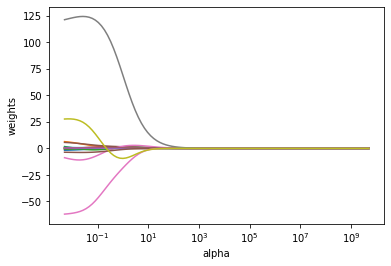

In [7]:
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

In [10]:
# Split data into training and test sets
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=789)

In [11]:
ridge2 = Ridge(alpha = 4, normalize = True)
ridge2.fit(X_train, y_train)             # Fit a ridge regression on the training data
pred2 = ridge2.predict(X_test)           # Use this model to predict the test data
print(pd.Series(ridge2.coef_, index = X.columns)) # Print coefficients
print(mean_squared_error(y_test, pred2))          # Calculate the test MSE

Ridge(alpha=4, normalize=True)

AtBat           0.090997
Hits            0.381452
HmRun           1.799439
Runs            0.692817
RBI             0.775769
Walks           1.106562
Years           2.837288
CAtBat          0.009429
CHits           0.033994
CHmRun          0.428637
CRuns           0.074811
CRBI            0.090881
CWalks          0.090166
PutOuts         0.079516
Assists         0.003372
Errors         -0.548098
League_A      -12.198986
Division_E     31.213557
NewLeague_A    -9.678549
dtype: float64
93194.09602342795


In [12]:
ridge3 = Ridge(alpha = 10**10, normalize = True)
ridge3.fit(X_train, y_train)             # Fit a ridge regression on the training data
pred3 = ridge3.predict(X_test)           # Use this model to predict the test data
print(pd.Series(ridge3.coef_, index = X.columns)) # Print coefficients
print(mean_squared_error(y_test, pred3))          # Calculate the test MSE

Ridge(alpha=10000000000, normalize=True)

AtBat          1.290322e-10
Hits           4.537076e-10
HmRun          2.347719e-09
Runs           8.001977e-10
RBI            9.434003e-10
Walks          1.119624e-09
Years          4.620997e-09
CAtBat         1.197958e-11
CHits          4.191918e-11
CHmRun         4.132552e-10
CRuns          8.665562e-11
CRBI           9.809036e-11
CWalks         1.075430e-10
PutOuts        6.233250e-11
Assists       -1.085161e-11
Errors        -2.839811e-10
League_A       2.173333e-10
Division_E     2.202505e-08
NewLeague_A   -1.721570e-09
dtype: float64
147404.17665352818


In [13]:
ridge2 = Ridge(alpha = 0, normalize = True)
ridge2.fit(X_train, y_train)             # Fit a ridge regression on the training data
pred = ridge2.predict(X_test)            # Use this model to predict the test data
print(pd.Series(ridge2.coef_, index = X.columns)) # Print coefficients
print(mean_squared_error(y_test, pred))           # Calculate the test MSE

Ridge(alpha=0, normalize=True)

AtBat          -1.874135
Hits            7.284181
HmRun           5.992851
Runs           -1.337057
RBI            -2.234989
Walks           3.229646
Years         -12.061302
CAtBat         -0.110062
CHits          -0.890440
CHmRun         -0.343774
CRuns           2.282806
CRBI            1.680861
CWalks         -0.452175
PutOuts         0.397417
Assists         0.874348
Errors        -10.925529
League_A      -80.711102
Division_E     85.308633
NewLeague_A   -38.183854
dtype: float64
116685.22043968162


In [14]:
ridgecv = RidgeCV(alphas = alphas, scoring = 'neg_mean_squared_error', normalize = True)
ridgecv.fit(X_train, y_train)
ridgecv.alpha_

RidgeCV(alphas=array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+0...
       1.00461650e+00, 7.59955541e-01, 5.74878498e-01, 4.34874501e-01,
       3.28966612e-01, 2.48851178e-01, 1.88246790e-01, 1.42401793e-01,
       1.07721735e-01, 8.14875417e-02, 6.16423370e-02, 4.66301673e-02,
       3.52740116e-02, 2.66834962e-02, 2.01850863e-02, 1.52692775e-02,
       1.15506485e-02, 8.73764200e-03, 6.60970574e-03, 5.00000000e-03]),
        normalize=True, scoring='neg_mean_squared_error')

0.24885117821660568

In [15]:
ridge4 = Ridge(alpha = ridgecv.alpha_, normalize = True)
ridge4.fit(X_train, y_train)
mean_squared_error(y_test, ridge4.predict(X_test))

Ridge(alpha=0.24885117821660568, normalize=True)

101622.12165139054

In [16]:
ridge4.fit(X, y)
pd.Series(ridge4.coef_, index = X.columns)

Ridge(alpha=0.24885117821660568, normalize=True)

AtBat           -0.086154
Hits             1.317767
HmRun           -0.583199
Runs             1.162454
RBI              0.853528
Walks            2.121383
Years           -2.306269
CAtBat           0.010015
CHits            0.079226
CHmRun           0.524670
CRuns            0.157256
CRBI             0.167912
CWalks          -0.028427
PutOuts          0.222818
Assists          0.070686
Errors          -2.510779
League_A       -35.270278
Division_E     106.535507
NewLeague_A     -1.361894
dtype: float64

Lasso(alpha=5000000000.0, max_iter=10000, normalize=True)

Lasso(alpha=5000000000.0, max_iter=10000, normalize=True)

Lasso(alpha=3782316637.773145, max_iter=10000, normalize=True)

Lasso(alpha=3782316637.773145, max_iter=10000, normalize=True)

Lasso(alpha=2861183829.67511, max_iter=10000, normalize=True)

Lasso(alpha=2861183829.67511, max_iter=10000, normalize=True)

Lasso(alpha=2164380640.5415306, max_iter=10000, normalize=True)

Lasso(alpha=2164380640.5415306, max_iter=10000, normalize=True)

Lasso(alpha=1637274581.438866, max_iter=10000, normalize=True)

Lasso(alpha=1637274581.438866, max_iter=10000, normalize=True)

Lasso(alpha=1238538177.995857, max_iter=10000, normalize=True)

Lasso(alpha=1238538177.995857, max_iter=10000, normalize=True)

Lasso(alpha=936908711.4301934, max_iter=10000, normalize=True)

Lasso(alpha=936908711.4301934, max_iter=10000, normalize=True)

Lasso(alpha=708737081.4634038, max_iter=10000, normalize=True)

Lasso(alpha=708737081.4634038, max_iter=10000, normalize=True)

Lasso(alpha=536133611.00516266, max_iter=10000, normalize=True)

Lasso(alpha=536133611.00516266, max_iter=10000, normalize=True)

Lasso(alpha=405565415.3948445, max_iter=10000, normalize=True)

Lasso(alpha=405565415.3948445, max_iter=10000, normalize=True)

Lasso(alpha=306795363.6706582, max_iter=10000, normalize=True)

Lasso(alpha=306795363.6706582, max_iter=10000, normalize=True)

Lasso(alpha=232079441.68063864, max_iter=10000, normalize=True)

Lasso(alpha=232079441.68063864, max_iter=10000, normalize=True)

Lasso(alpha=175559586.71075636, max_iter=10000, normalize=True)

Lasso(alpha=175559586.71075636, max_iter=10000, normalize=True)

Lasso(alpha=132804389.1473342, max_iter=10000, normalize=True)

Lasso(alpha=132804389.1473342, max_iter=10000, normalize=True)

Lasso(alpha=100461650.1282523, max_iter=10000, normalize=True)

Lasso(alpha=100461650.1282523, max_iter=10000, normalize=True)

Lasso(alpha=75995554.14764665, max_iter=10000, normalize=True)

Lasso(alpha=75995554.14764665, max_iter=10000, normalize=True)

Lasso(alpha=57487849.769886784, max_iter=10000, normalize=True)

Lasso(alpha=57487849.769886784, max_iter=10000, normalize=True)

Lasso(alpha=43487450.13088917, max_iter=10000, normalize=True)

Lasso(alpha=43487450.13088917, max_iter=10000, normalize=True)

Lasso(alpha=32896661.232878413, max_iter=10000, normalize=True)

Lasso(alpha=32896661.232878413, max_iter=10000, normalize=True)

Lasso(alpha=24885117.82166057, max_iter=10000, normalize=True)

Lasso(alpha=24885117.82166057, max_iter=10000, normalize=True)

Lasso(alpha=18824679.033962358, max_iter=10000, normalize=True)

Lasso(alpha=18824679.033962358, max_iter=10000, normalize=True)

Lasso(alpha=14240179.342179025, max_iter=10000, normalize=True)

Lasso(alpha=14240179.342179025, max_iter=10000, normalize=True)

Lasso(alpha=10772173.450159412, max_iter=10000, normalize=True)

Lasso(alpha=10772173.450159412, max_iter=10000, normalize=True)

Lasso(alpha=8148754.173103217, max_iter=10000, normalize=True)

Lasso(alpha=8148754.173103217, max_iter=10000, normalize=True)

Lasso(alpha=6164233.69721033, max_iter=10000, normalize=True)

Lasso(alpha=6164233.69721033, max_iter=10000, normalize=True)

Lasso(alpha=4663016.734416099, max_iter=10000, normalize=True)

Lasso(alpha=4663016.734416099, max_iter=10000, normalize=True)

Lasso(alpha=3527401.1553593227, max_iter=10000, normalize=True)

Lasso(alpha=3527401.1553593227, max_iter=10000, normalize=True)

Lasso(alpha=2668349.615603151, max_iter=10000, normalize=True)

Lasso(alpha=2668349.615603151, max_iter=10000, normalize=True)

Lasso(alpha=2018508.6292982749, max_iter=10000, normalize=True)

Lasso(alpha=2018508.6292982749, max_iter=10000, normalize=True)

Lasso(alpha=1526927.7544167063, max_iter=10000, normalize=True)

Lasso(alpha=1526927.7544167063, max_iter=10000, normalize=True)

Lasso(alpha=1155064.850041579, max_iter=10000, normalize=True)

Lasso(alpha=1155064.850041579, max_iter=10000, normalize=True)

Lasso(alpha=873764.2000038414, max_iter=10000, normalize=True)

Lasso(alpha=873764.2000038414, max_iter=10000, normalize=True)

Lasso(alpha=660970.5742330144, max_iter=10000, normalize=True)

Lasso(alpha=660970.5742330144, max_iter=10000, normalize=True)

Lasso(alpha=500000.0, max_iter=10000, normalize=True)

Lasso(alpha=500000.0, max_iter=10000, normalize=True)

Lasso(alpha=378231.66377731453, max_iter=10000, normalize=True)

Lasso(alpha=378231.66377731453, max_iter=10000, normalize=True)

Lasso(alpha=286118.382967511, max_iter=10000, normalize=True)

Lasso(alpha=286118.382967511, max_iter=10000, normalize=True)

Lasso(alpha=216438.06405415307, max_iter=10000, normalize=True)

Lasso(alpha=216438.06405415307, max_iter=10000, normalize=True)

Lasso(alpha=163727.45814388624, max_iter=10000, normalize=True)

Lasso(alpha=163727.45814388624, max_iter=10000, normalize=True)

Lasso(alpha=123853.81779958545, max_iter=10000, normalize=True)

Lasso(alpha=123853.81779958545, max_iter=10000, normalize=True)

Lasso(alpha=93690.87114301915, max_iter=10000, normalize=True)

Lasso(alpha=93690.87114301915, max_iter=10000, normalize=True)

Lasso(alpha=70873.70814634024, max_iter=10000, normalize=True)

Lasso(alpha=70873.70814634024, max_iter=10000, normalize=True)

Lasso(alpha=53613.36110051616, max_iter=10000, normalize=True)

Lasso(alpha=53613.36110051616, max_iter=10000, normalize=True)

Lasso(alpha=40556.54153948436, max_iter=10000, normalize=True)

Lasso(alpha=40556.54153948436, max_iter=10000, normalize=True)

Lasso(alpha=30679.536367065877, max_iter=10000, normalize=True)

Lasso(alpha=30679.536367065877, max_iter=10000, normalize=True)

Lasso(alpha=23207.944168063863, max_iter=10000, normalize=True)

Lasso(alpha=23207.944168063863, max_iter=10000, normalize=True)

Lasso(alpha=17555.958671075638, max_iter=10000, normalize=True)

Lasso(alpha=17555.958671075638, max_iter=10000, normalize=True)

Lasso(alpha=13280.43891473342, max_iter=10000, normalize=True)

Lasso(alpha=13280.43891473342, max_iter=10000, normalize=True)

Lasso(alpha=10046.16501282523, max_iter=10000, normalize=True)

Lasso(alpha=10046.16501282523, max_iter=10000, normalize=True)

Lasso(alpha=7599.555414764665, max_iter=10000, normalize=True)

Lasso(alpha=7599.555414764665, max_iter=10000, normalize=True)

Lasso(alpha=5748.784976988678, max_iter=10000, normalize=True)

Lasso(alpha=5748.784976988678, max_iter=10000, normalize=True)

Lasso(alpha=4348.745013088917, max_iter=10000, normalize=True)

Lasso(alpha=4348.745013088917, max_iter=10000, normalize=True)

Lasso(alpha=3289.6661232878414, max_iter=10000, normalize=True)

Lasso(alpha=3289.6661232878414, max_iter=10000, normalize=True)

Lasso(alpha=2488.511782166057, max_iter=10000, normalize=True)

Lasso(alpha=2488.511782166057, max_iter=10000, normalize=True)

Lasso(alpha=1882.4679033962318, max_iter=10000, normalize=True)

Lasso(alpha=1882.4679033962318, max_iter=10000, normalize=True)

Lasso(alpha=1424.0179342178994, max_iter=10000, normalize=True)

Lasso(alpha=1424.0179342178994, max_iter=10000, normalize=True)

Lasso(alpha=1077.2173450159412, max_iter=10000, normalize=True)

Lasso(alpha=1077.2173450159412, max_iter=10000, normalize=True)

Lasso(alpha=814.8754173103217, max_iter=10000, normalize=True)

Lasso(alpha=814.8754173103217, max_iter=10000, normalize=True)

Lasso(alpha=616.4233697210329, max_iter=10000, normalize=True)

Lasso(alpha=616.4233697210329, max_iter=10000, normalize=True)

Lasso(alpha=466.30167344161, max_iter=10000, normalize=True)

Lasso(alpha=466.30167344161, max_iter=10000, normalize=True)

Lasso(alpha=352.74011553593226, max_iter=10000, normalize=True)

Lasso(alpha=352.74011553593226, max_iter=10000, normalize=True)

Lasso(alpha=266.8349615603151, max_iter=10000, normalize=True)

Lasso(alpha=266.8349615603151, max_iter=10000, normalize=True)

Lasso(alpha=201.85086292982749, max_iter=10000, normalize=True)

Lasso(alpha=201.85086292982749, max_iter=10000, normalize=True)

Lasso(alpha=152.69277544167062, max_iter=10000, normalize=True)

Lasso(alpha=152.69277544167062, max_iter=10000, normalize=True)

Lasso(alpha=115.50648500415791, max_iter=10000, normalize=True)

Lasso(alpha=115.50648500415791, max_iter=10000, normalize=True)

Lasso(alpha=87.37642000038414, max_iter=10000, normalize=True)

Lasso(alpha=87.37642000038414, max_iter=10000, normalize=True)

Lasso(alpha=66.09705742330144, max_iter=10000, normalize=True)

Lasso(alpha=66.09705742330144, max_iter=10000, normalize=True)

Lasso(alpha=50.0, max_iter=10000, normalize=True)

Lasso(alpha=50.0, max_iter=10000, normalize=True)

Lasso(alpha=37.823166377731454, max_iter=10000, normalize=True)

Lasso(alpha=37.823166377731454, max_iter=10000, normalize=True)

Lasso(alpha=28.611838296751102, max_iter=10000, normalize=True)

Lasso(alpha=28.611838296751102, max_iter=10000, normalize=True)

Lasso(alpha=21.643806405415308, max_iter=10000, normalize=True)

Lasso(alpha=21.643806405415308, max_iter=10000, normalize=True)

Lasso(alpha=16.372745814388658, max_iter=10000, normalize=True)

Lasso(alpha=16.372745814388658, max_iter=10000, normalize=True)

Lasso(alpha=12.38538177995857, max_iter=10000, normalize=True)

Lasso(alpha=12.38538177995857, max_iter=10000, normalize=True)

Lasso(alpha=9.369087114301934, max_iter=10000, normalize=True)

Lasso(alpha=9.369087114301934, max_iter=10000, normalize=True)

Lasso(alpha=7.087370814634009, max_iter=10000, normalize=True)

Lasso(alpha=7.087370814634009, max_iter=10000, normalize=True)

Lasso(alpha=5.361336110051605, max_iter=10000, normalize=True)

Lasso(alpha=5.361336110051605, max_iter=10000, normalize=True)

Lasso(alpha=4.055654153948428, max_iter=10000, normalize=True)

Lasso(alpha=4.055654153948428, max_iter=10000, normalize=True)

Lasso(alpha=3.0679536367065814, max_iter=10000, normalize=True)

Lasso(alpha=3.0679536367065814, max_iter=10000, normalize=True)

Lasso(alpha=2.320794416806386, max_iter=10000, normalize=True)

Lasso(alpha=2.320794416806386, max_iter=10000, normalize=True)

Lasso(alpha=1.7555958671075638, max_iter=10000, normalize=True)

Lasso(alpha=1.7555958671075638, max_iter=10000, normalize=True)

Lasso(alpha=1.328043891473342, max_iter=10000, normalize=True)

Lasso(alpha=1.328043891473342, max_iter=10000, normalize=True)

Lasso(alpha=1.004616501282523, max_iter=10000, normalize=True)

Lasso(alpha=1.004616501282523, max_iter=10000, normalize=True)

Lasso(alpha=0.7599555414764666, max_iter=10000, normalize=True)

Lasso(alpha=0.7599555414764666, max_iter=10000, normalize=True)

Lasso(alpha=0.5748784976988678, max_iter=10000, normalize=True)

Lasso(alpha=0.5748784976988678, max_iter=10000, normalize=True)

Lasso(alpha=0.4348745013088917, max_iter=10000, normalize=True)

Lasso(alpha=0.4348745013088917, max_iter=10000, normalize=True)

Lasso(alpha=0.3289666123287841, max_iter=10000, normalize=True)

Lasso(alpha=0.3289666123287841, max_iter=10000, normalize=True)

Lasso(alpha=0.24885117821660568, max_iter=10000, normalize=True)

Lasso(alpha=0.24885117821660568, max_iter=10000, normalize=True)

Lasso(alpha=0.18824679033962358, max_iter=10000, normalize=True)

Lasso(alpha=0.18824679033962358, max_iter=10000, normalize=True)

Lasso(alpha=0.14240179342179024, max_iter=10000, normalize=True)

Lasso(alpha=0.14240179342179024, max_iter=10000, normalize=True)

Lasso(alpha=0.10772173450159389, max_iter=10000, normalize=True)

Lasso(alpha=0.10772173450159389, max_iter=10000, normalize=True)

Lasso(alpha=0.08148754173103201, max_iter=10000, normalize=True)

Lasso(alpha=0.08148754173103201, max_iter=10000, normalize=True)

Lasso(alpha=0.06164233697210317, max_iter=10000, normalize=True)

Lasso(alpha=0.06164233697210317, max_iter=10000, normalize=True)

Lasso(alpha=0.0466301673441609, max_iter=10000, normalize=True)

Lasso(alpha=0.0466301673441609, max_iter=10000, normalize=True)

Lasso(alpha=0.03527401155359316, max_iter=10000, normalize=True)

Lasso(alpha=0.03527401155359316, max_iter=10000, normalize=True)

Lasso(alpha=0.026683496156031508, max_iter=10000, normalize=True)

Lasso(alpha=0.026683496156031508, max_iter=10000, normalize=True)

Lasso(alpha=0.020185086292982747, max_iter=10000, normalize=True)

Lasso(alpha=0.020185086292982747, max_iter=10000, normalize=True)

Lasso(alpha=0.015269277544167062, max_iter=10000, normalize=True)

Lasso(alpha=0.015269277544167062, max_iter=10000, normalize=True)

Lasso(alpha=0.01155064850041579, max_iter=10000, normalize=True)

Lasso(alpha=0.01155064850041579, max_iter=10000, normalize=True)

Lasso(alpha=0.008737642000038414, max_iter=10000, normalize=True)

Lasso(alpha=0.008737642000038414, max_iter=10000, normalize=True)

Lasso(alpha=0.006609705742330144, max_iter=10000, normalize=True)

Lasso(alpha=0.006609705742330144, max_iter=10000, normalize=True)

Lasso(alpha=0.005, max_iter=10000, normalize=True)

Lasso(alpha=0.005, max_iter=10000, normalize=True)

(0.0025118864315095794,
 39810717055.34969,
 -635.6640407799204,
 850.9722032102175)

Text(0.5, 0, 'alpha')

Text(0, 0.5, 'weights')

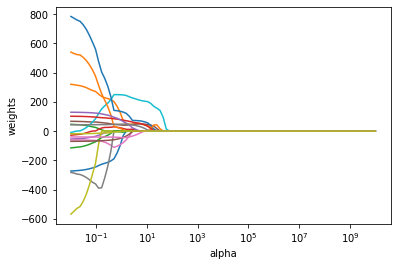

In [17]:
lasso = Lasso(max_iter = 10000, normalize = True)
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(scale(X_train), y_train)
    coefs.append(lasso.coef_)
    
ax = plt.gca()
ax.plot(alphas*2, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

In [18]:
lassocv = LassoCV(alphas = None, cv = 10, max_iter = 100000, normalize = True)
lassocv.fit(X_train, y_train)

lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(X_train, y_train)
mean_squared_error(y_test, lasso.predict(X_test))

LassoCV(cv=10, max_iter=100000, normalize=True)

Lasso(alpha=3.203215689824921, max_iter=10000, normalize=True)

Lasso(alpha=3.203215689824921, max_iter=10000, normalize=True)

109110.91726566025

In [19]:
pd.Series(lasso.coef_, index=X.columns)

AtBat           0.000000
Hits            1.047575
HmRun           0.000000
Runs            0.000000
RBI             0.000000
Walks           2.303069
Years           0.000000
CAtBat          0.000000
CHits           0.000000
CHmRun          2.503006
CRuns           0.186151
CRBI            0.000000
CWalks          0.000000
PutOuts         0.186743
Assists         0.000000
Errors         -0.000000
League_A      -12.847143
Division_E     50.877022
NewLeague_A    -0.000000
dtype: float64